# Notebook activity 4.9 A regression model with two factors for the OU students dataset

In this notebook activity, we'll model data from the OU students dataset (Subsection 5.3, Unit 4), taking `examScore` to be our response variable, and the factors `qualLink` and `imd` to be our explanatory variables, where:

* `examScore` the final exam score, taking values from 0 to 100 (rounded to the nearest integer)
* `qualLink` the OU qualification the student is linked to taking possible values maths (for qualifications containing substantial mathematical content) and not (for all other qualifications or no qualification link)
* `imd` the index of multiple deprivation (IMD), which is a measure of the level of deprivation for the student’s (UK) postcode address, taking the values most (for the most deprived areas with IMD values 0% to 35%), middle (for areas with IMD values 35% to 65%), least (for the least deprived areas with IMD values 65% to 100%) and other (for non-UK students or where the value of IMD is unknown).

The data are stored in the data frame `ouStudents`.

## (a) Getting started

### (i)

Start by loading the `M348` package, loading the `ouStudents` data frame checking that `ouStudents` has loaded correctly, by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the ouStudents data frame
data(ouStudents)
# Check the data frame has loaded OK
head(ouStudents)

### (ii)

Check that both `qualLink` and `imd` are factors by running the following code.

In [ ]:
class(ouStudents$qualLink)
class(ouStudents$imd)

### (iii) 

Run the following code to answer the following.
* What does level 1 of `qualLink` correspond to? 
* What does level 1 of `imd` correspond to?

In [ ]:
levels(ouStudents$qualLink)
levels(ouStudents$imd)

#### Solution <a class="tocSkip">

Level 1 of `qualLink` corresponds to not and level 1 of `imd` corresponds to most.

## (b) Exploring the data

### (i) 

Run the code cell below to produce the means plots for the response `examScore` across the two factors `qualLink` and `imd`.

In [ ]:
with(ouStudents, {
    interaction.plot(qualLink, imd, examScore)
    interaction.plot(imd, qualLink, examScore)
})

### (ii)

Explain why the plots you produced in part (i) suggest that a model for `examScore` using the factors `qualLink` and `imd` may need to include an interaction term.

#### Solution <a class="tocSkip">

The lines in both of the means plots are certainly not parallel, and so a model using these two factors may need an interaction term.

## (c) Fitting a model

### (i)

Use the empty code cell below to fit a model for the response `examScore` with the  factors `qualLink` and `imd` as the explanatory variables, including an interaction. Store the results of this fitted model in the object `examScoreFitInteraction` and produce a summary of the results.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [5]:
examScoreFitInteraction <- lm(examScore ~ qualLink * imd, data = ouStudents)
summary(examScoreFitInteraction)


Call:
lm(formula = examScore ~ qualLink * imd, data = ouStudents)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.101 -12.101   2.599  14.899  33.599 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              69.9231     2.1477  32.558  < 2e-16 ***
qualLinkmaths            -4.5224     2.3974  -1.886  0.05940 .  
imdmiddle                -0.5897     2.8353  -0.208  0.83525    
imdleast                 -2.7662     2.6389  -1.048  0.29467    
imdother                 -6.8374     3.8590  -1.772  0.07660 .  
qualLinkmaths:imdmiddle   3.7050     3.1707   1.169  0.24276    
qualLinkmaths:imdleast    7.4661     2.9572   2.525  0.01166 *  
qualLinkmaths:imdother   11.6339     4.3082   2.700  0.00699 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.97 on 1788 degrees of freedom
Multiple R-squared:  0.009871,	Adjusted R-squared:  0.005995 
F-statistic: 2.547 on 7 and 1788 DF,  p-value: 0.01

### (ii)

Calculate the fitted value of `examScore` for the third student - a student whose value of `qualLink` is maths and whose value of `imd` is least.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

Alternatively this value can be calculated from the `Coefficients` table.

\begin{equation*} \begin{align*}
\widehat{y}_{3} & = \{\text{baseline mean}\} +  \{\text{effect of linked qualification being maths}\}+  \{\text{effect of IMD is least }\} \\
 & \, + \{\text{interaction effect of linked qualification being maths and IMD is least} \}\\
 & = 69.9231  -4.5224 -2.7662 + 7.4661\\
 & = 70.1006 \simeq 70.10.
\end{align*} \end{equation*}

This means the fitted value for the third student is 70.10 (to two decimal places).

In [6]:
fitted.values(examScoreFitInteraction)[3]

3 
70.10054

## (d) Testing the model

### (i)

Use the empty code cell below to fit the model `examScore ~ qualLink + imd`, and then carry out an ANOVA test to check whether the interaction between `qualLink` and `imd` needs to be in the model.

#### Solution <a class="tocSkip">

The required code is given below together with the resulting output.

In [7]:
# Fit the model with no interaction
examScoreFitParallel <- lm(examScore ~ qualLink + imd, data = ouStudents)

# Carry out ANOVA tests comparing the fit of the model without the interaction
#  with the model with the interaction
anova(examScoreFitParallel, examScoreFitInteraction)

Res.Df RSS      Df Sum of Sq F        Pr(>F)    
1 1791   646933.1 NA       NA        NA         NA
2 1788   643275.0  3 3658.085  3.389249 0.01739863

### (ii)

Using the results you obtained in (i), what do you conclude?

#### Solution <a class="tocSkip">

The $p$-value for the test is small ($p = 0.017$). We (the module team) would judge this small enough to conclude that there *is* an interaction between `qualLink` and `imd`, and so the interaction should be included in the model when `qualLink` and `imd` are in the model.

---

## (e) Checking the model

### (i)

Use the empty code cell below to obtain the residual plot and the normal probability plot for the fitted model with the interaction. 

#### Solution <a class="tocSkip">

The code to produce the required plots is given below, together with the resulting plots.

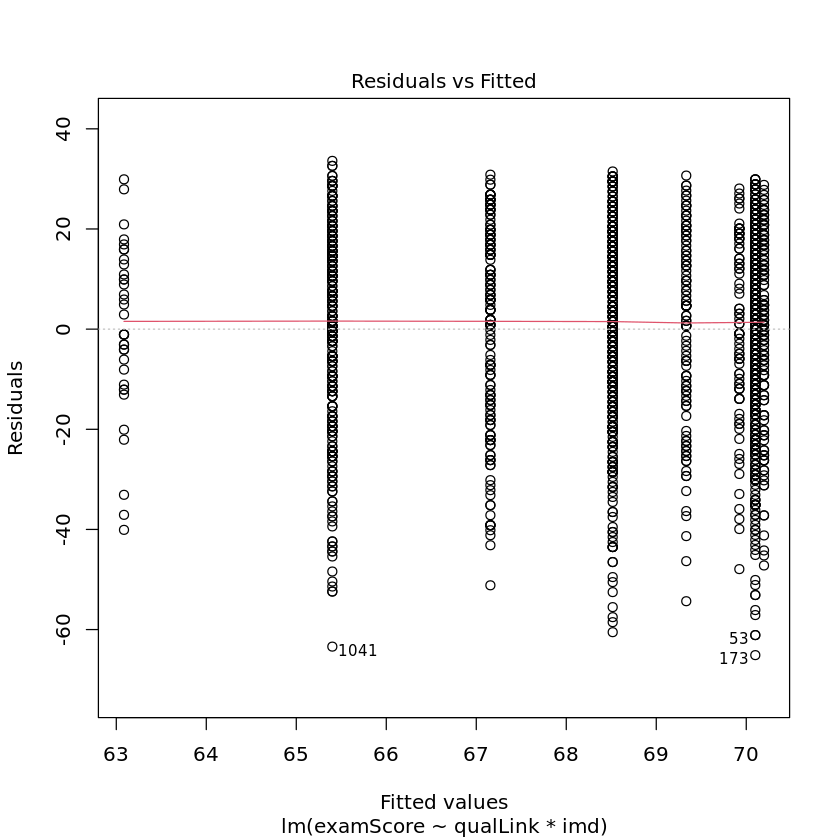

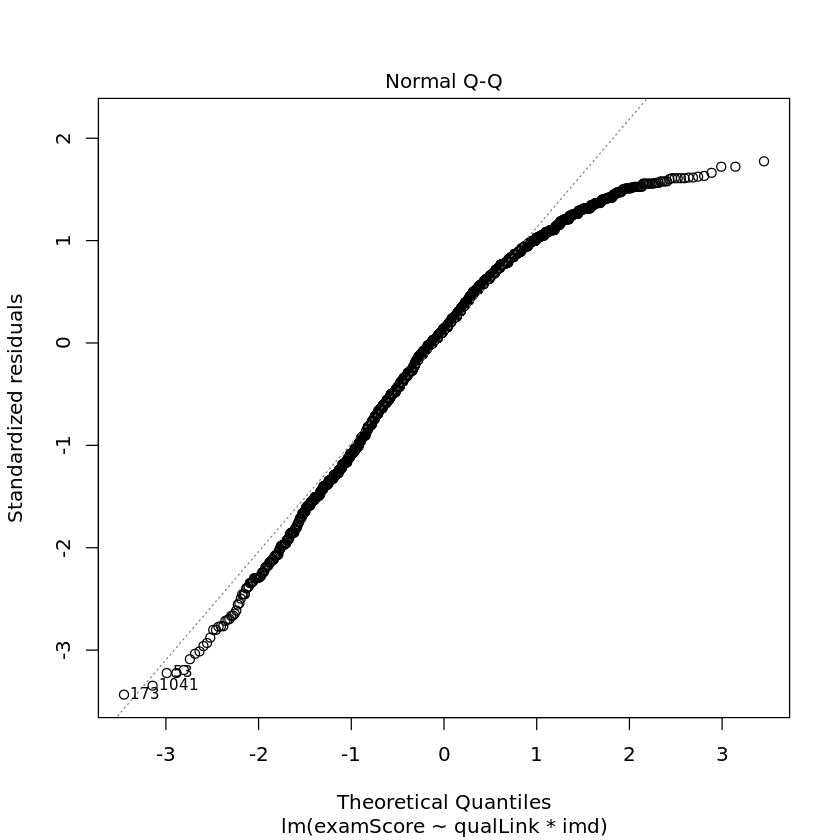

In [8]:
# Residual plot
plot(examScoreFitInteraction, 1)

# Normal probability plot
plot(examScoreFitInteraction, 2)

### (ii)

Based on the plots you obtained in part (i), do the assumptions that the error terms $W_1, W_2, \ldots, W_n$ are normally distributed with zero mean and constant variance seem reasonable?

#### Solution <a class="tocSkip">

In the residual plot, the scatter of the points around the zero line seems to be roughly similar. Thus, the assumption of  constant variance seems reasonable. However, there is some suggestion that the scatter around the zero line is not symmetric as we would expect if the error terms are normally distributed with zero mean.

Also, the points in the normal probability plot start to deviate from the line quite sharply for the higher fitted values. The normality assumption is therefore also questionable.